In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
import os
os.chdir(r"C:\Users\shachini dinushika\Documents\Data\spaceship-titanic")


In [4]:
filename= 'train.csv'
df=pd.read_csv(filename)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
df.corr(numeric_only=True)['Transported'].sort_values()

RoomService    -0.244611
Spa            -0.221131
VRDeck         -0.207075
Age            -0.075026
ShoppingMall    0.010141
FoodCourt       0.046566
Transported     1.000000
Name: Transported, dtype: float64

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'RoomService'}>],
       [<AxesSubplot: title={'center': 'FoodCourt'}>,
        <AxesSubplot: title={'center': 'ShoppingMall'}>],
       [<AxesSubplot: title={'center': 'Spa'}>,
        <AxesSubplot: title={'center': 'VRDeck'}>]], dtype=object)

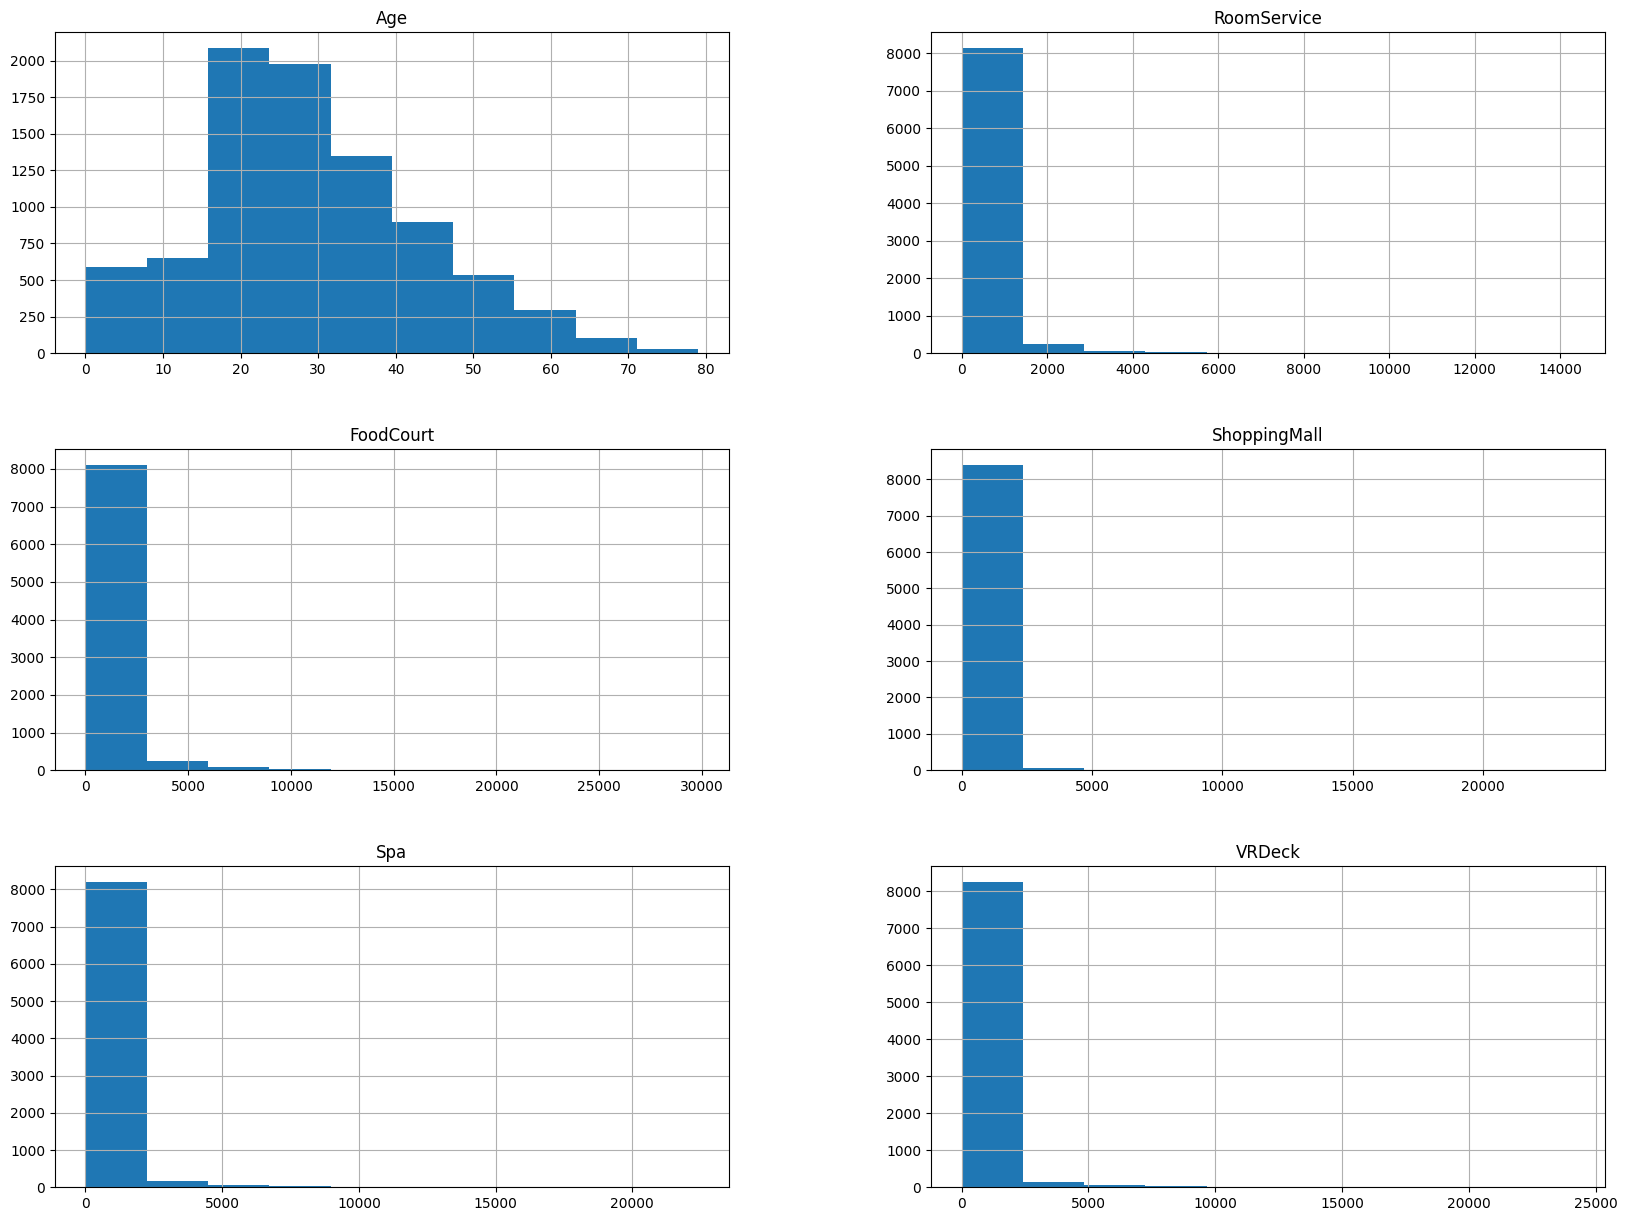

In [8]:
df.hist(bins=10, figsize=(20,15))

In [9]:
df.groupby(["Transported"])["PassengerId"].count()

Transported
False    4315
True     4378
Name: PassengerId, dtype: int64

<AxesSubplot: xlabel='Age', ylabel='Transported'>

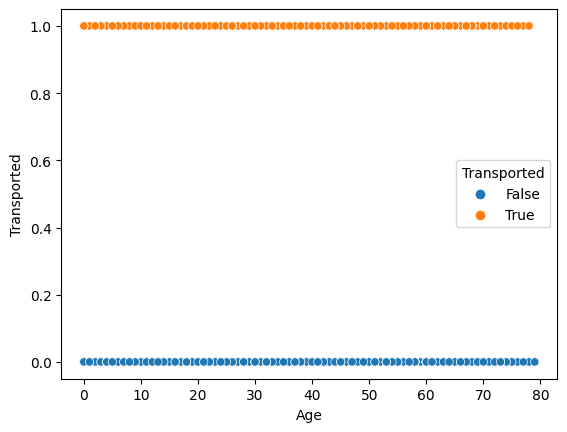

In [10]:
sns.scatterplot(x= df["Age"], y=df["Transported"],hue = df["Transported"],data = df)

#### Creating the model


In [11]:
X = df['Age']
y = df['Transported']

In [12]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [13]:
X_new = SelectKBest(f_classif, k=2).fit_transform(X, y)

ValueError: Expected 2D array, got 1D array instead:
array=[39. 24. 58. ... 26. 32. 44.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.